In [490]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
from einops import rearrange
import mat73
import h5py
import rasterio
import slideio
import torchstain
import warnings

warnings.filterwarnings('ignore')


import math
import torch
import os
from torchvision.transforms import (
    RandomHorizontalFlip,
    RandomRotation,
    RandomVerticalFlip,
    RandomApply,
    InterpolationMode,
    RandomCrop,
    RandomResizedCrop
)
from einops import rearrange
import numpy as np

In [40]:
image_paths = os.listdir('10x_images_segmentations')
for i_path, image_path in enumerate(image_paths):
    file_id = image_path.replace('.pt', '')

    # load annotations
    convert_c_ganglia = torch.ByteTensor(mat73.loadmat(f'ganglia_mat_files/{file_id}_certainGanglia_P1.mat')['mask']).unsqueeze(dim=0)
    torch.save(obj=convert_c_ganglia, f=f'ganglia_annotations/{file_id}_certainGanglia_P1.pt')
    
    convert_p_ganglia = torch.ByteTensor(mat73.loadmat(f'ganglia_mat_files/{file_id}_potentialGanglia_P1.mat')['mask']).unsqueeze(dim=0)
    torch.save(obj=convert_p_ganglia, f=f'ganglia_annotations/{file_id}_potentialGanglia_P1.pt')
    
    c_ganglia = torch.load(f'ganglia_annotations/{file_id}_certainGanglia_P1.pt')
    p_ganglia = torch.load(f'ganglia_annotations/{file_id}_potentialGanglia_P1.pt')
    
#     ganglia_combined = c_ganglia + p_ganglia

    torch_obj = torch.load(f'10x_images_segmentations/{file_id}.pt')
    
    # resizing the annotation masks to be the same size as the WSI (so the pixels line-up)
    ganglia_certain = Resize(size=(torch_obj['img'].shape[1], torch_obj['img'].shape[2]), interpolation=InterpolationMode.NEAREST)(c_ganglia)
    ganglia_potential = Resize(size=(torch_obj['img'].shape[1], torch_obj['img'].shape[2]), interpolation=InterpolationMode.NEAREST)(p_ganglia)
    
    print(torch_obj["img"].shape, torch_obj["muscle"].shape, torch_obj["plexus"].shape, ganglia_certain.shape, ganglia_potential.shape)  # double check all are equal
    
    if torch_obj["muscle"].shape == torch_obj["plexus"].shape == ganglia_certain.shape == ganglia_potential.shape:
        torch_obj["ganglia_certain"] = ganglia_certain
        torch_obj["ganglia_potential"] = ganglia_potential
        print("Shapes match")
    else:
        print("Shapes do NOT match")

    # save normalized WSI and annotations
    save_path = f'10x_images_segmentations_with_ganglia/{file_id}.pt'
    torch.save(obj=torch_obj,
               f=save_path)


torch.Size([3, 15338, 18982]) torch.Size([1, 15338, 18982]) torch.Size([1, 15338, 18982]) torch.Size([1, 15338, 18982]) torch.Size([1, 15338, 18982])
Shapes match
torch.Size([3, 13394, 28973]) torch.Size([1, 13394, 28973]) torch.Size([1, 13394, 28973]) torch.Size([1, 13394, 28973]) torch.Size([1, 13394, 28973])
Shapes match
torch.Size([3, 11165, 16984]) torch.Size([1, 11165, 16984]) torch.Size([1, 11165, 16984]) torch.Size([1, 11165, 16984]) torch.Size([1, 11165, 16984])
Shapes match
torch.Size([3, 8801, 8991]) torch.Size([1, 8801, 8991]) torch.Size([1, 8801, 8991]) torch.Size([1, 8801, 8991]) torch.Size([1, 8801, 8991])
Shapes match
torch.Size([3, 8280, 12988]) torch.Size([1, 8280, 12988]) torch.Size([1, 8280, 12988]) torch.Size([1, 8280, 12988]) torch.Size([1, 8280, 12988])
Shapes match
torch.Size([3, 12513, 17983]) torch.Size([1, 12513, 17983]) torch.Size([1, 12513, 17983]) torch.Size([1, 12513, 17983]) torch.Size([1, 12513, 17983])
Shapes match
torch.Size([3, 14898, 12988]) torch.S

In [644]:
test = torch.load("ganglia_train/has_465_S14-2038.pt")

In [645]:
a = test["ganglia_certain"]
a = a.squeeze(dim=0)
a.shape

KeyError: 'ganglia_certain'

In [76]:
c = test["ganglia_potential"]
c = c.squeeze(dim=0)
c.shape

torch.Size([13107, 7992])

In [69]:
b = test["img"]
b.shape

torch.Size([3, 13107, 7992])

In [77]:
nxc = c.numpy()
np.where(nxc == 1)

(array([2538, 2538, 2538, 2538, 2538, 2538, 2538, 2538, 2538, 2538, 2538,
        2539, 2539, 2539, 2539, 2539, 2539, 2539, 2539, 2539, 2539, 2539,
        2539, 2539, 2539, 2540, 2540, 2540, 2540, 2540, 2540, 2540, 2540,
        2540, 2540, 2540, 2540, 2540, 2540, 2540, 2541, 2541, 2541, 2541,
        2541, 2541, 2541, 2541, 2541, 2541, 2541, 2541, 2541, 2541, 2541,
        2541, 2542, 2542, 2542, 2542, 2542, 2542, 2542, 2542, 2542, 2542,
        2542, 2542, 2542, 2542, 2542, 2543, 2543, 2543, 2543, 2543, 2543,
        2543, 2543, 2543, 2543, 2543, 2543, 2543, 2543, 2543, 2544, 2544,
        2544, 2544, 2544, 2544, 2544, 2544, 2544, 2544, 2544, 2544, 2544,
        2544, 2545, 2545, 2545, 2545, 2545, 2545, 2545, 2545, 2545, 2545,
        2545, 2545, 2546, 2546, 2546, 2546, 2546, 8313, 8313, 8313, 8313,
        8313, 8313, 8314, 8314, 8314, 8314, 8314, 8314, 8314, 8314, 8314,
        8315, 8315, 8315, 8315, 8315, 8315, 8315, 8315, 8315, 8315, 8315,
        8315, 8315, 8316, 8316, 8316, 

In [88]:
cut = a[2520:2560, 4100:4200]
cut.shape

torch.Size([40, 100])

In [83]:
cutc = c[2520:2560, 4100:4200]
cutc.shape

torch.Size([40, 100])

In [86]:
cut_b = b[:, 2520:2560, 4100:4200]

In [95]:
 if (cutc.any() == 1):
        print("yes")

yes


In [74]:
for i in range(5):
    if i > 3:
        break
    print(i)

0
1
2
3


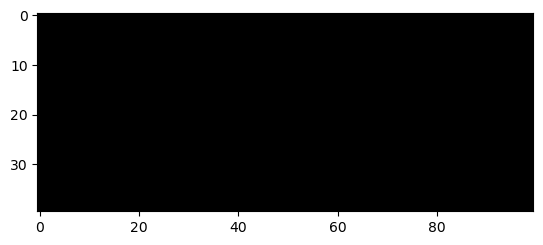

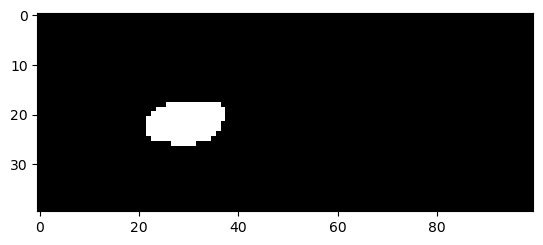

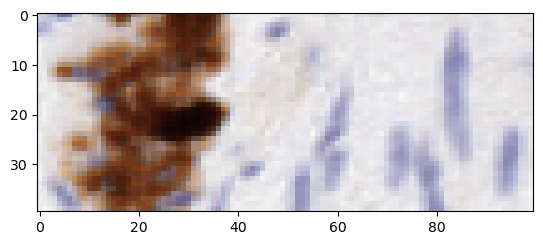

In [89]:
plt.imshow(cut, cmap='gray')
plt.show()

plt.imshow(cutc, cmap='gray')
plt.show()

plt.imshow(rearrange(cut_b,'c h w -> h w c' ))
plt.show()

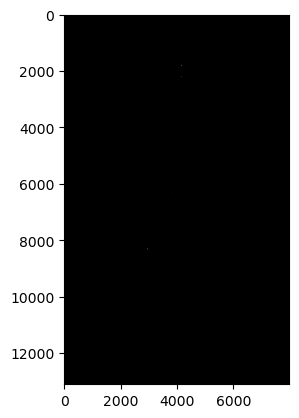

In [20]:
plt.imshow(rearrange(a, 'c h w -> h w c'), cmap='gray')
plt.show()

In [678]:
tile = torch.load("ganglia_train/has_311_S16-1197 B2.pt") # has_111_S02-484.pt, has_499_S02-484.pt

# has_345_S14-580.pt

In [679]:
i = tile['imgs'].squeeze(dim=0)
p = tile['ganglia_potential_map'].squeeze(dim=0)
c = tile['ganglia_certain_map'].squeeze(dim=0)

In [682]:
if (c.count_nonzero() >= 1):
    print("Yes")
else:
    print("No")

Yes


In [683]:
p.count_nonzero()

tensor(116)

In [684]:
if (c.any() == 1):
    print("Yes")
else:
    print("No")

Yes


In [685]:
nxp = p.numpy()
np.where(nxp == 1)

(array([ 0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
         9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
        11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13]),
 array([461, 462, 463, 464, 459, 460, 461, 462, 463, 464, 465, 466, 459,
        460, 461, 462, 463, 464, 465, 466, 467, 459, 460, 461, 462, 463,
        464, 465, 466, 467, 468, 459, 460, 461, 462, 463, 464, 465, 466,
        467, 468, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 459,
        460, 461, 462, 463, 464, 465, 466, 467, 468, 459, 460, 461, 462,
        463, 464, 465, 466, 467, 468, 459, 460, 461, 462, 463, 464, 465,
        466, 467, 468, 459, 460, 461, 46

In [686]:
nxc = c.numpy()
np.where(nxc == 1)

(array([ 0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 

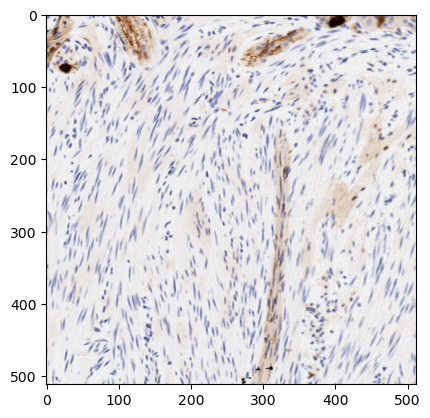

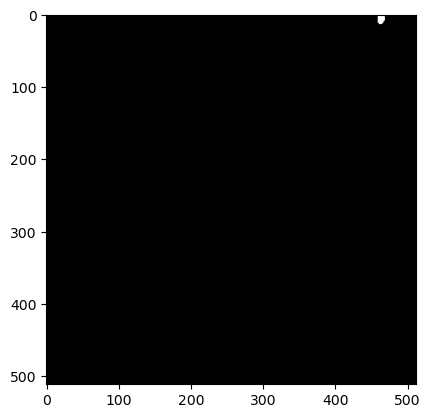

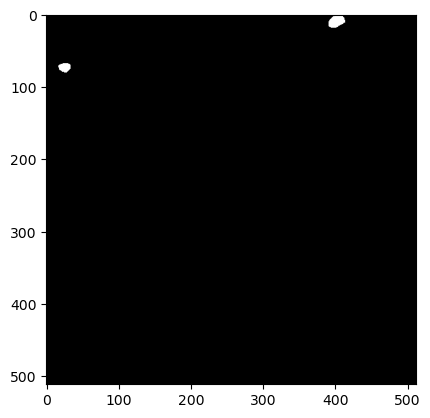

In [687]:
plt.imshow(rearrange(tile['imgs'],'c h w -> h w c'))
plt.show()

plt.imshow(rearrange(tile['ganglia_potential_map'],'c h w -> h w c'), cmap='gray')
plt.show()

plt.imshow(rearrange(tile['ganglia_certain_map'],'c h w -> h w c' ), cmap='gray')
plt.show()

In [671]:
data_paths = os.listdir('ganglia_test')

count = 0
for i_path, data_path in enumerate(data_paths): 
    if data_path.startswith("has_"):
        count += 1
print(count)

3500


In [690]:
data_paths = os.listdir('ganglia_val')
count = 0
for i_path, data_path in enumerate(data_paths):
    torch_obj = torch.load(f'ganglia_val/{data_path}')
    img = torch_obj['imgs']
    ganglia_potential = torch_obj['ganglia_potential_map']
    ganglia_certain = torch_obj['ganglia_certain_map']  
    
    
    if (ganglia_certain.any() == 1) and (ganglia_potential.any() == 1):
        print(data_path)
        count += 1
# print(count)
        

has_453_S09-2723.pt
has_269_S16-567.pt
has_417_S16-567.pt
has_344_S09-2909.pt
has_143_S09-2909.pt
has_117_S09-2723.pt
has_346_S09-2909.pt
has_199_S09-2909.pt
has_221_S09-2723.pt
has_188_S09-2723.pt
has_407_S04-1840.pt
has_346_S09-2723.pt
has_396_S16-567.pt
has_265_S09-2723.pt
has_391_S09-2909.pt
has_466_S09-2723.pt
has_485_S09-2909.pt
has_191_S09-2723.pt
has_443_S09-2723.pt
has_54_S09-2909.pt
has_296_S09-2909.pt
has_218_S09-2723.pt
has_19_S09-2723.pt
has_287_S16-1415.pt
has_499_S09-2909.pt
has_285_S09-2909.pt
has_342_S09-2909.pt
has_262_S09-2723.pt
has_232_S16-1415.pt
has_65_S09-2909.pt
has_65_S09-2723.pt
has_22_S09-2723.pt
has_76_S09-2909.pt
has_162_S09-2909.pt
has_283_S16-1415.pt
has_353_S16-567.pt
has_7_S16-567.pt
has_302_S09-2723.pt
has_262_S09-2909.pt
has_176_S04-1840.pt
has_156_S09-2723.pt
has_17_S16-567.pt
has_369_S04-1840.pt
has_319_S09-2909.pt
has_339_S16-1415.pt
has_452_S16-1415.pt
has_79_S09-2723.pt
has_467_S16-567.pt
has_333_S04-1840.pt
has_129_S16-567.pt
has_463_S16-1415.p

has_264_S16-1415.pt
has_232_S16-567.pt
has_269_S09-2723.pt
has_498_S09-2909.pt
has_266_S09-2909.pt
has_404_S09-2909.pt
has_226_S09-2723.pt
has_414_S16-567.pt
has_258_S09-2723.pt
has_56_S09-2723.pt
has_216_S16-1415.pt
has_464_S09-2909.pt
has_338_S04-1840.pt
has_217_S09-2723.pt
has_353_S09-2723.pt
has_478_S09-2909.pt
has_72_S09-2723.pt
has_278_S16-1415.pt
has_67_S16-1415.pt
has_451_S09-2723.pt
has_177_S04-1840.pt
has_225_S09-2723.pt
has_246_S04-1840.pt
has_371_S16-1415.pt
has_67_S09-2723.pt
has_301_S09-2909.pt
has_113_S16-1415.pt
has_258_S04-1840.pt
has_176_S09-2723.pt
has_426_S09-2723.pt
has_148_S09-2909.pt
has_175_S09-2723.pt
has_366_S09-2909.pt
has_432_S04-1840.pt
has_17_S09-2909.pt
has_488_S09-2909.pt
has_51_S09-2909.pt
has_327_S09-2723.pt
has_278_S09-2909.pt
has_142_S16-567.pt
has_297_S16-567.pt
has_59_S09-2909.pt
has_349_S09-2723.pt
has_433_S16-567.pt
has_78_S09-2909.pt
has_149_S09-2723.pt
has_179_S04-1840.pt
has_308_S16-567.pt
has_385_S09-2909.pt
has_274_S09-2909.pt
has_320_S16-14